Change the notebook working directory to the Google Drive folder containing the dataset

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/pdm dataset/project_dataset')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset consists of the following:<br>
1. <b>Telemetry Time Series Data (PdM_telemetry.csv)</b>: <br>It consists of hourly average of <u>voltage</u>, <u>rotation</u>, <u>pressure</u>, <u>vibration</u> collected from 100 machines for the year 2015.

2. <b>Error (PdM_errors.csv)</b>: <br>These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

3. <b>Maintenance (PdM_maint.csv)</b>: <br>If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

4. <b>Failures (PdM_failures.csv)</b>: <br>Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

5. <b>Metadata of Machines (PdM_machines.csv)</b>: <br>Model type & age of the Machines.

In [ ]:
telemetry_ds = pd.read_csv('PdM_telemetry.csv')
errors_ds = pd.read_csv('PdM_errors.csv')
maintenance_ds = pd.read_csv('PdM_maint.csv')
failures_ds = pd.read_csv('PdM_failures.csv')
machines_ds = pd.read_csv('PdM_machines.csv')

## Datasets summary

Telemetry Time Series Data (PdM_telemetry.csv)

In [ ]:
telemetry_ds.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
telemetry_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [ ]:
telemetry_ds.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


---
Error (PdM_errors.csv)

In [ ]:
errors_ds.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
errors_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


---
Maintenance (PdM_maint.csv)

In [ ]:
maintenance_ds.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
maintenance_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


---
Failures (PdM_failures.csv)

In [ ]:
failures_ds.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
failures_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


---
Metadata of Machines (PdM_machines.csv)

In [ ]:
machines_ds.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
machines_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


---
From the dataset overview above, the data can be joined (by machineID and datetime) in a single large dataset containing all the records for all the machines

In [ ]:
merged_ds = telemetry_ds.merge(failures_ds, on=['datetime','machineID'],how='outer')
merged_ds = merged_ds.merge(errors_ds, on=['datetime','machineID'],how='outer')
merged_ds = merged_ds.merge(maintenance_ds, on=['datetime','machineID'],how='outer')
merged_ds = merged_ds.merge(machines_ds, on=['machineID'],how='outer')
merged_ds_dummies = pd.get_dummies(merged_ds,columns=['errorID','comp','failure'])
merged_ds_dummies.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID_error1,errorID_error2,...,errorID_error4,errorID_error5,comp_comp1,comp_comp2,comp_comp3,comp_comp4,failure_comp1,failure_comp2,failure_comp3,failure_comp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged_ds_dummies.describe()

,machineID,volt,rotate,pressure,vibration,age,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5,comp_comp1,comp_comp2,comp_comp3,comp_comp4,failure_comp1,failure_comp2,failure_comp3,failure_comp4
count,877609.000000,877209.000000,877209.000000,877209.000000,877209.000000,877609.000000,877609.000000,877609.000000,877609.000000,877609.00000,877609.000000,877609.000000,877609.000000,877609.000000,877609.000000,877609.000000,877609.000000,877609.000000,877609.000000
mean,50.498446,170.780942,446.570735,100.861433,40.386459,11.330280,0.001154,0.001126,0.000955,0.00083,0.000407,0.000938,0.001014,0.000934,0.000951,0.000332,0.000440,0.000216,0.000291
std,28.866697,15.511268,52.698963,11.052195,5.371894,5.827535,0.033955,0.033534,0.030886,0.02879,0.020165,0.030609,0.031829,0.030553,0.030831,0.018206,0.020968,0.014712,0.017043
min,1.000000,97.333604,138.432075,51.237106,14.877054,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,160.305918,412.265479,93.499116,36.777911,7.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,170.609301,447.537538,100.426820,40.238339,12.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,181.008303,482.157025,107.557338,43.786484,16.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,255.124717,695.020984,185.951998,76.791072,20.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
Histograms

In [ ]:
merged_ds.groupby(['failure'], dropna=False, as_index=False).size()

,failure,size
0,comp1,291
1,comp2,386
2,comp3,190
3,comp4,255
4,NaN,876487


<AxesSubplot:xlabel='failure'>

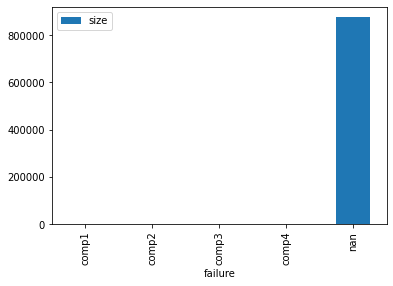

In [ ]:
merged_ds.groupby(['failure'], dropna=False, as_index=False).size().plot(x='failure',kind='bar')

<AxesSubplot:xlabel='failure'>

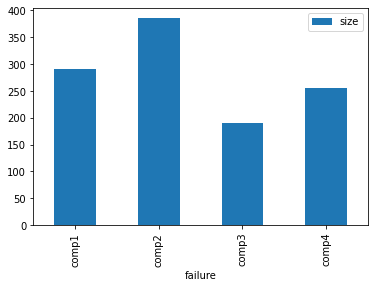

In [ ]:
merged_ds.groupby(['failure'], dropna=True, as_index=False).size().plot(x='failure',kind='bar')

<AxesSubplot:xlabel='errorID'>

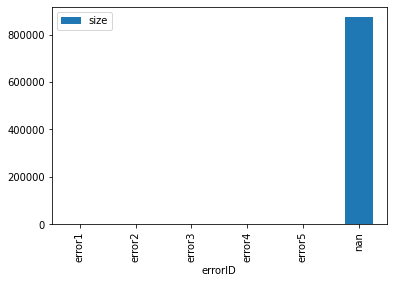

In [ ]:
merged_ds.groupby(['errorID'], dropna=False, as_index=False).size().plot(x='errorID',kind='bar')

<AxesSubplot:>

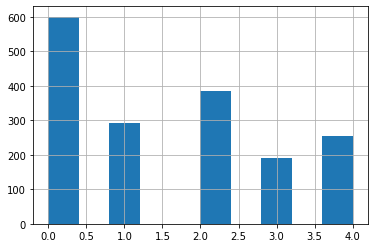

In [ ]:
training_ds = merged_ds.drop(columns = ["datetime","machineID","errorID","comp","model","age"])
training_ds.loc[training_ds["failure"] == 'comp1','failure'] = 1
training_ds.loc[training_ds["failure"] == 'comp2','failure'] = 2
training_ds.loc[training_ds["failure"] == 'comp3','failure'] = 3
training_ds.loc[training_ds["failure"] == 'comp4','failure'] = 4
balanced_ds = training_ds
balanced_ds = balanced_ds.dropna()
training_ds.loc[training_ds["failure"].isna(),'failure'] = 0
balanced_ds = balanced_ds.append(training_ds[training_ds["failure"] == 0].sample(600))
balanced_ds = balanced_ds.sample(frac = 1)
balanced_ds["failure"].hist()

In [ ]:
balanced_ds

,volt,rotate,pressure,vibration,failure
746506,167.210084,350.964889,99.725923,43.460244,2
865879,189.337240,450.150198,103.996522,40.219528,3
514524,168.463385,441.852254,89.292962,45.873445,4
563481,165.037142,472.029519,106.346164,42.557831,1
327294,170.451492,396.066447,89.726508,48.004017,4
...,...,...,...,...,...
445822,168.573174,441.529267,93.954646,40.240627,0
649578,174.964689,540.790991,103.761249,38.065381,1
811726,179.323884,393.594057,96.274142,48.665333,1
801247,189.843776,351.115732,89.547454,40.947225,2


In [ ]:
cols = ["volt","rotate","pressure","vibration"	]
for column in cols:
  balanced_ds[column] = (balanced_ds[column]-balanced_ds[column].min())/(balanced_ds[column].max()-balanced_ds[column].min())
balanced_ds

,volt,rotate,pressure,vibration,failure
746506,0.430283,0.333195,0.366863,0.510359,2
865879,0.614898,0.563467,0.405899,0.430161,3
514524,0.440740,0.544203,0.271500,0.570079,4
563481,0.412153,0.614263,0.427376,0.488027,1
327294,0.457327,0.437904,0.275463,0.622804,4
...,...,...,...,...,...
445822,0.441656,0.543453,0.314110,0.430683,0
649578,0.494983,0.773903,0.403748,0.376852,1
811726,0.531353,0.432164,0.335312,0.639170,1
801247,0.619125,0.333545,0.273826,0.448169,2


---
# Classification model

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow.keras.losses as loss
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model

In [ ]:
x_train = balanced_ds.iloc[:1377,[0,1,2,3]].to_numpy()
y_train = balanced_ds.iloc[:1377,[4]]
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)

In [ ]:
y_train[y_train["failure"]==0]
y_train=to_categorical(y_train,num_classes=5)
print(x_train.shape)
print(y_train.shape)

(1377, 4)
(1377, 5)


In [ ]:
model=Sequential()
model.add(Dense(128, activation='tanh' ,input_shape=(4,) ))
model.add(Dense(64, activation='tanh' ))
model.add(Dense(32, activation='tanh' ))
model.add(Dense(32, activation='tanh' ))
model.add(Dense(5, activation='softmax' ))

model.summary()

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer,  loss='categorical_crossentropy',metrics=['accuracy'] )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 12,197
Trainable params: 12,197
Non-trainable params: 0
_________________________________________________________________


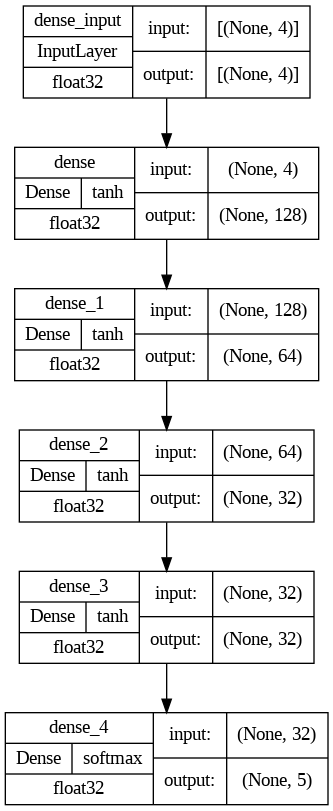

In [ ]:
plot_model(model, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    show_layer_activations=True)

In [ ]:
# filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
filepath="classification_model_best_only.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
result = model.fit(x_train,y_train,batch_size=5,epochs=800, validation_split=.2,callbacks=checkpoint)

Epoch 1/800
221/221 [==============================] - 6s 13ms/step - loss: 1.3544 - accuracy: 0.4441 - val_loss: 1.2075 - val_accuracy: 0.4746
Epoch 2/800
221/221 [==============================] - 1s 6ms/step - loss: 1.2011 - accuracy: 0.5186 - val_loss: 1.1316 - val_accuracy: 0.5254
Epoch 3/800
221/221 [==============================] - 1s 6ms/step - loss: 1.1437 - accuracy: 0.5504 - val_loss: 1.0501 - val_accuracy: 0.5870
Epoch 4/800
221/221 [==============================] - 2s 8ms/step - loss: 1.0911 - accuracy: 0.5577 - val_loss: 0.9649 - val_accuracy: 0.6051
Epoch 5/800
221/221 [==============================] - 2s 7ms/step - loss: 1.0804 - accuracy: 0.5740 - val_loss: 1.0038 - val_accuracy: 0.6196
Epoch 6/800
221/221 [==============================] - 2s 7ms/step - loss: 1.0608 - accuracy: 0.5804 - val_loss: 1.0242 - val_accuracy: 0.5616
Epoch 7/800
221/221 [==============================] - 1s 6ms/step - loss: 1.0592 - accuracy: 0.5622 - val_loss: 0.9899 - val_accuracy: 0.583

In [ ]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

44/44 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8947
Accuracy: 89.47


In [ ]:
model = keras.models.load_model(filepath)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

44/44 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8526
Accuracy: 85.26


---
# Validation

In [ ]:
from sklearn import metrics

In [ ]:
x_test = balanced_ds.iloc[1378:,[0,1,2,3]].to_numpy()
y_test = balanced_ds.iloc[1378:,[4]]
scaler = MinMaxScaler(feature_range=(0,1))
x_test = scaler.fit_transform(x_test)

In [ ]:
y_test[y_test["failure"]==0]
y_test=to_categorical(y_test,num_classes=5)
print(x_test.shape)
print(y_test.shape)

(344, 4)
(344, 5)


In [ ]:
prediction = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [ ]:
prediction

array([[1.83034107e-01, 3.35996086e-03, 6.89174612e-06, 2.67962841e-05,
        8.13572168e-01],
       [5.95312893e-01, 3.71361375e-01, 1.57114794e-03, 3.16874171e-03,
        2.85858661e-02],
       [9.98454511e-01, 4.89857932e-08, 4.34369460e-04, 2.16015845e-08,
        1.11114932e-03],
       ...,
       [1.12988826e-04, 8.73685523e-04, 5.04176244e-02, 8.41819144e-07,
        9.48594749e-01],
       [1.43415837e-05, 9.78472531e-01, 1.88321881e-02, 2.75908546e-10,
        2.68091494e-03],
       [2.86830902e-01, 1.86671296e-05, 7.12706804e-01, 1.83583015e-08,
        4.43651370e-04]], dtype=float32)

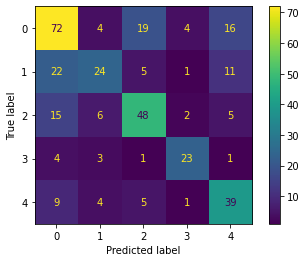

In [ ]:
prediction = np.argmax (prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)
confusion_matrix = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()

In [ ]:
validation_accuracy = confusion_matrix.diagonal().sum() / confusion_matrix.sum()
print(validation_accuracy)

0.5988372093023255
